# PANDAS

## Introducing Pandas Objects

- Three fundamental Pandas data structures: *the Series, DataFrame, and Index*.

In [1]:
import numpy as np
import pandas as pd

### The Pandas Series Object

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### Series as generalized NumPy array

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
    
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) 
# We can even use noncontiguous 
# or nonsequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### Series as specialized dictionary

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

In [13]:
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
population['California']

38332521

In [12]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

#### Constructing Series objects

In [13]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [14]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [15]:
pd.Series({2:'a', 1:'b', 3:'c'})
#data can be a dictionary, in which index defaults to the sorted dictionary keys

2    a
1    b
3    c
dtype: object

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) 

3    c
2    a
dtype: object

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[2, 1]) 

2    a
1    b
dtype: object

### The Pandas DataFrame Object

#### DataFrame as a generalized NumPy array

In [9]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

In [10]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [14]:
states = pd.DataFrame({'population': population,'area': area})

states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [15]:
states.index 

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [16]:
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as specialized dictionary

In [23]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [24]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

#### Constructing DataFrame objects
A Pandas DataFrame can be constructed in a variety of ways.<br>
Here we’ll give several examples:

1. From a single Series object

In [25]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


2. From a list of dicts

In [26]:
data = [{'a': i, 'b': 2 * i}
       for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [27]:
 pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


3. From a dictionary of Series objects

In [28]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


4. From a two-dimensional NumPy array

In [29]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.900965,0.721018
b,0.984289,0.609298
c,0.757632,0.068729


5. From a NumPy structured array

In [30]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print(A)

[(0, 0.) (0, 0.) (0, 0.)]


In [31]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values).

In [2]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array

In [3]:
ind[1]

3

In [4]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [35]:
print(ind.size, ind.shape, ind.ndim, ind.dtype) 
#Index objects also have many of the attributes familiar from NumPy arrays

5 (5,) 1 int64


#### Index as ordered set

In [5]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [6]:
indA.intersection(indB) #intersection

Int64Index([3, 5, 7], dtype='int64')

In [38]:
indA.union(indB) # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [39]:
print(indA.symmetric_difference(indB))

Int64Index([1, 2, 9, 11], dtype='int64')


## Data Indexing and Selection

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                  index=['a', 'b', 'c', 'd'])

In [8]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
'a' in data

True

In [10]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax. Just as you can 
extend a dictionary by assigning to a new key, you can extend a Series by assigning
to a new index value:

In [45]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

- A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays that is, slices, masking, and fancy indexing. Examples of these are as follows:


In [11]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [47]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [48]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [49]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [50]:
c = data[['a', 'e']]
c

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit
Python-style index

In [17]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [52]:
# explicit index when indexing
data[1]

'a'

In [53]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

<div class="alert alert-block alert-danger">
<b>Confusion:</b><br>
 - Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. <br>
 - These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.
</div>

1. First, the loc attribute allows indexing and slicing that always references the explicit index:

In [54]:
data.loc[1]

'a'

In [55]:
data.loc[1:3]

1    a
3    b
dtype: object

2. The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [56]:
data.iloc[1]

'b'

In [57]:
 data.iloc[1:3]

3    b
5    c
dtype: object

### Data Selection in DataFrame

#### DataFrame as a dictionary

In [13]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})

In [14]:
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

In [15]:
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


*The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:*

In [61]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [62]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

> *ike with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case to add a new column:*

In [16]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as two-dimensiona array

In [64]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [65]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [66]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [14]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [67]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [68]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [69]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [70]:
data.loc[data.density > 100, ]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [71]:
data.loc[data.density > 100, ['pop', 'area']]

,pop,area
New York,19651127,141297
Florida,19552860,170312


In [72]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [73]:
data[data.density >= 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [74]:
c = data[data.density > 110]
c

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Operating on Data in Pandas

### Ufuncs: Index Preservation

>*Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects. Let’s start by defining a simple Series and DataFrame on which to demonstrate this:*

In [17]:
import pandas as pd
import numpy as np

In [19]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [20]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [21]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment

#### Index alignment in Series

In [23]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [24]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [25]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

>*If using NaN values is not the desired behavior, we can modify the fill value using appropriate object methods in place of the operators.<br> 
For example, calling A.add(B)is equivalent to calling A + B, but allows optional explicit specification of the fill value for any elements in A or B that might be missing:*


In [26]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame

`A similar type of alignment takes place for both columns and indices when you are performing operations on DataFrames:`

In [27]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [28]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [29]:
list('BAC')

['B', 'A', 'C']

In [30]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [31]:
fill = A.stack().mean()
fill

4.5

In [32]:
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [33]:
A.mean()

A    3.0
B    6.0
dtype: float64

In [35]:
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### Ufuncs: Operations Between DataFrame and Series

***
> When you are performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:



In [36]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [37]:
A = rng.randint(10, size=(3, 4))
A

array([[1, 9, 8, 9],
       [4, 1, 3, 6],
       [7, 2, 0, 3]])

In [38]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 3, -8, -5, -3],
       [ 6, -7, -8, -6]])

In [39]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,3,-8,-5,-3
2,6,-7,-8,-6


In [41]:
df

,Q,R,S,T
0,1,9,8,9
1,4,1,3,6
2,7,2,0,3


In [43]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-8,0,-1,0
1,3,0,2,5
2,5,0,-2,1


In [44]:
halfrow = df.iloc[0, ::2]
halfrow

Q    1
S    8
Name: 0, dtype: int32

In [48]:
halfrow.shape

(2,)

In [45]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,3.0,NaN,-5.0,NaN
2,6.0,NaN,-8.0,NaN


## Handling Missing Data

> The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

- In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python. Here and throughout the book, we’ll refer to missing data in general as null, NaN, or NA values.

### Missing Data in Pandas

#### None: Pythonic missing data

In [49]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

#### NaN: Missing numerical data

In [50]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [51]:
1 + np.nan


nan

In [52]:
0 * np.nan

nan

In [53]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [54]:
# NumPy does provide some special aggregations that will ignore these missing values:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### NaN and None in Pandas

In [55]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

> NaN and None both have their place, and Pandas is built to handle the two of them
nearly interchangeably, converting between them where appropriate.

In [56]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [57]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Operating on Null Values

#### Detecting null values

In [58]:
data = pd.Series([1, np.nan, 'hello', None])

In [59]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [60]:
za = data[data.isnull()]

In [61]:
za

1     NaN
3    None
dtype: object

In [62]:
ze = data[data.notnull()]
ze

0        1
2    hello
dtype: object

#### Dropping null values

In [63]:
data.dropna()

0        1
2    hello
dtype: object

In [64]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


> We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so dropna() gives a number of options for a DataFrame.

In [65]:
#By default, dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2.0,3.0,5


- Alternatively, you can drop NA values along a different axis; axis=1 drops all columns containing a null value:

In [67]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [68]:
df.dropna(axis=0)

,0,1,2
1,2.0,3.0,5


In [69]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [70]:
df.dropna(axis='rows')

,0,1,2
1,2.0,3.0,5


In [71]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [72]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [73]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [76]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [77]:
#We can fill NA entries with a single value, such as zero:
data.fillna(10)

a     1.0
b    10.0
c     2.0
d    10.0
e     3.0
dtype: float64

In [78]:
#We can specify a forward-fill to propagate the previous value forward:
# forward-fill:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [79]:
# we can specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [80]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [81]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

### A Multiply Indexed Series

#### Pandas MultiIndex

In [2]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
 
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

In [14]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [15]:
pop = pd.Series(populations, index=index)
print(pop)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [16]:
# Now to access all data for which the second index is 2010,
#we can simply use the Pandas slicing notation:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

#### MultiIndex as extra dimension

In [17]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


- The **unstack()** method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame. Naturally, the **stack()** method provides the opposite operation **:)**

In [18]:
 pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [19]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})

In [20]:
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

> In addition, all the ufuncs and other functionality discussed in **“Operating on Data in Pandas”** work with hierarchical indices as well. Here we compute the fraction of people under 18 by year, given the above data:

In [21]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation

In [22]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.216396  0.892034
  2  0.736107  0.994940
b 1  0.416500  0.623326
  2  0.126086  0.059754

In [23]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}

In [24]:
ce = pd.Series(data)
ce

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [25]:
ce.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


#### Explict MultiIndex constructors

In [26]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [27]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [28]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### MultiIndex level names

In [29]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns

In [30]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                      ['HR', 'Temp']],
                                     names=['subject', 'type'])

In [31]:
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [33]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  35.6  36.0  36.9  37.0  37.0
     2      21.0  36.5  17.0  37.5  49.0  36.5
2014 1      27.0  37.5  29.0  36.8  43.0  36.6
     2      47.0  38.2  45.0  37.1  47.0  35.2

In [34]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      36.0  36.9
     2      17.0  37.5
2014 1      29.0  36.8
     2      45.0  37.1

### Indexing and Slicing a MultiIndex

#### Multiply indexed Series

In [32]:
 pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [35]:
pop['California', 2000]

33871648

In [36]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [37]:
pop['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [38]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

- selection based on Boolean masks

In [39]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

- Selection based on fancy indexing:

In [40]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames

In [41]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  35.6  36.0  36.9  37.0  37.0
     2      21.0  36.5  17.0  37.5  49.0  36.5
2014 1      27.0  37.5  29.0  36.8  43.0  36.6
     2      47.0  38.2  45.0  37.1  47.0  35.2

In [42]:
health_data['Guido', 'HR']

year  visit
2013  1        36.0
      2        17.0
2014  1        29.0
      2        45.0
Name: (Guido, HR), dtype: float64

In [43]:
health_data.iloc[:2, :4]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 1      55.0  35.6  36.0  36.9
     2      21.0  36.5  17.0  37.5

In [44]:
health_data.iloc[1:3, :4]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 2      21.0  36.5  17.0  37.5
2014 1      27.0  37.5  29.0  36.8

In [45]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        55.0
      2        21.0
2014  1        27.0
      2        47.0
Name: (Bob, HR), dtype: float64

### Rearranging Multi-Indices

> One of the keys to working with multiply indexed data is knowing how to effectively transform the data. There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations. We
saw a brief example of this in the stack() and unstack() methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns, and we’ll explore them here.

#### Sorted and unsorted indices

In [46]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.521899
      2      0.194394
c     1      0.784488
      2      0.793734
b     1      0.668003
      2      0.973753
dtype: float64

In [47]:
data = data.sort_index()
data

char  int
a     1      0.521899
      2      0.194394
b     1      0.668003
      2      0.973753
c     1      0.784488
      2      0.793734
dtype: float64

In [48]:
data['a':'b']

char  int
a     1      0.521899
      2      0.194394
b     1      0.668003
      2      0.973753
dtype: float64

#### Stacking and unstacking indices

In [49]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [50]:
pop.unstack(level=1)


year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


`The opposite` of **unstack() is stack()**, which here can be used to recover the original series:

In [51]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the reset_index method. Calling this on the population dictionary will result in a DataFrame with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation:

In [52]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when you are working with data in the real world, the raw input data looks like this and it’s useful to build a MultiIndex from the column values. This can be done with the set_index method of the DataFrame, which returns a multiply indexed DataFrame:

In [53]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

In [54]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      55.0  35.6  36.0  36.9  37.0  37.0
     2      21.0  36.5  17.0  37.5  49.0  36.5
2014 1      27.0  37.5  29.0  36.8  43.0  36.6
     2      47.0  38.2  45.0  37.1  47.0  35.2

> Perhaps we’d like to average out the measurements in the two visits each year. We can do this by naming the index level we’d like to explore, in this case the year:

In [57]:
data_mean = health_data.groupby(level='year').mean()
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     38.0  36.05  26.5  37.20  43.0  36.75
2014     37.0  37.85  37.0  36.95  45.0  35.90

In [58]:
data_mean1 = health_data.groupby(level='year').median()
data_mean1

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     38.0  36.05  26.5  37.20  43.0  36.75
2014     37.0  37.85  37.0  36.95  45.0  35.90

> By further making use of the axis keyword, we can take the mean among levels on the columns as well:

In [60]:
data_mean.groupby(axis = 1, level="type").mean()

type,HR,Temp
year,,
2013,35.833333,36.666667
2014,39.666667,36.900000


<div class="alert alert-block alert-info">
<b>Median and Mean</b>:)<br>
    Jereo tsara ny difference entre izy roa .
</div>

## Combining Datasets: Concat and Append

In [2]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [3]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Recall: Concatenation of NumPy Arrays

In [4]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with pd.concat

In [6]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [7]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [8]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [9]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='rows'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1


#### Duplicate indices

> One important difference between **np.concatenate and pd.concat** is that Pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

In [10]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [11]:
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


#### Adding MultiIndex keys

In [12]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### Concatenation with joins

In [13]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [14]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [15]:

print(pd.concat([df5, df6], join='outer'))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


>inner (intersect) <br> outer (union)

#### The append() method

In [16]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_3844\1561387783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1); print(df2); print(df1.append(df2))


In [20]:
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


<div class="alert alert-block alert-danger">
<b>Aty ny maso:</b> <br>
    Tsy dia tena tsara ny mampiasa anio methode append io fa aleo mampiasa ny pandas concatenation ihany.
</div>

## Combining Datasets: Merge and Join

### Relational Algebra
- The behavior implemented in pd.merge() is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
-  The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset. With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.
- Pandas implements several of these fundamental building blocks in the pd.merge() function and the related join() method of Series and DataFrames. As we will see, these let you efficiently link data from different sources.


### Categories

- one-to-one
- many-to-one
- many-to-many joins.

#### One-to-one joins

In [18]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})


In [19]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [20]:
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [21]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Many-to-one joins

In [22]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [24]:
print(df3);

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [25]:
print(df4);

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [26]:
print(pd.merge(df3, df4))

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### Many-to-many joins

In [27]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


### Specification of the Merge Key

#### The on keyword

In [28]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


#### The left_on and right_on keywords

In [29]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

In [30]:
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [31]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords

In [32]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [34]:
print(df1a);

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR


In [35]:
print(df2a);

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [36]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices

In [37]:
print(df1a); 

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR


In [38]:
print(df3);

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [39]:
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


### Specifying Set Arithmetic for Joins

In [40]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

In [41]:
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

In [42]:
print(df6); 

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread


In [43]:
print(df7); 

     name drink
0    Mary  wine
1  Joseph  beer


In [44]:
print(pd.merge(df6, df7))

   name   food drink
0  Mary  bread  wine


In [47]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [48]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [50]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [51]:
print(df6); print(df7); print(pd.merge(df6, df7, how='right'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


### Overlapping Column Names: The suffixes Keyword

In [52]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

In [53]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

In [54]:
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [55]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [56]:
print(pop.head()); 

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0


In [57]:
print(areas.head()); 

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [58]:
print(abbrevs.head())

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [78]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')

In [63]:
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [81]:
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_2488\3312235128.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [80]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

In [82]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [83]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [84]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [85]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [86]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [87]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [88]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [89]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [90]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [91]:
density

state
Alabama                   91.287603
Alaska                     1.087509
Arizona                   56.214497
Arkansas                  54.948667
California               228.051342
Colorado                  48.493718
Connecticut              645.600649
Delaware                 460.445752
District of Columbia    8898.897059
Florida                  286.597129
Georgia                  163.409902
Hawaii                   124.746707
Idaho                     18.794338
Illinois                 221.687472
Indiana                  178.197831
Iowa                      54.202751
Kansas                    34.745266
Kentucky                 107.586994
Louisiana                 87.676099
Maine                     37.509990
Maryland                 466.445797
Massachusetts            621.815538
Michigan                 102.015794
Minnesota                 61.078373
Mississippi               61.321530
Missouri                  86.015622
Montana                    6.736171
Nebraska              

In [92]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [93]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

### Planets Data

In [95]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [96]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [97]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [99]:
a = np.sum(ser)
print(a)

2.811925491708157


In [101]:
b = np.mean(ser)
print(b)

0.5623850983416314


In [103]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

df

,A,B
0,0.183405,0.611853
1,0.304242,0.139494
2,0.524756,0.292145
3,0.431945,0.366362
4,0.291229,0.456070


In [104]:
df.mean()

A    0.347115
B    0.373185
dtype: float64

In [105]:
np.mean(df)

C:\Users\PERSONNE\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


A    0.347115
B    0.373185
dtype: float64

<div class="alert alert-block alert-danger">
<b>Aty ny maso:</b> <br>
    aleo mampiasa mean tsotra toy izay mampiaraka azy amin'ny numpy
</div>

In [106]:
df.mean(axis='columns')

0    0.397629
1    0.221868
2    0.408451
3    0.399153
4    0.373650
dtype: float64

In [107]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split, Apply, Combine

#### Split, apply, combine

In [108]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])

In [109]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [110]:
df.groupby('key')

In [111]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [112]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy object

##### Column indexing

In [113]:
planets.groupby('method')

In [114]:
planets.groupby('method')['orbital_period']

In [115]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

##### Iteration over groups

In [116]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [117]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


##### Dispatch methods

In [118]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Aggregate, filter, transform, apply

In [119]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregate

In [120]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [121]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [122]:
def filter_func(x):
    return x['data2'].std() > 4

In [123]:
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


##### Transformation

In [124]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply() method

In [125]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x


In [126]:
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [127]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [128]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [129]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8


In [130]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [131]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

### Motivating Pivot Tables

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [133]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

In [134]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [135]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [137]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multilevel pivot tables

In [138]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [139]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [140]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [141]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Example: Birthrate Data

In [142]:
births = pd.read_csv('data/births.csv')

In [143]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [144]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


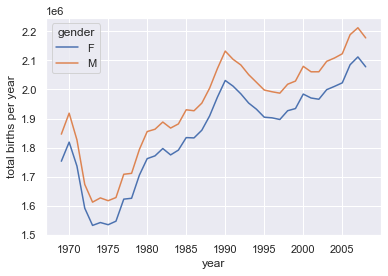

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [154]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [155]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [156]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [161]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month + 
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

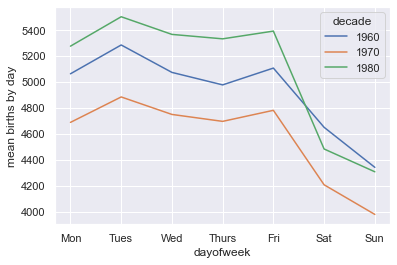

In [162]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.ylabel('mean births by day');

In [163]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [164]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


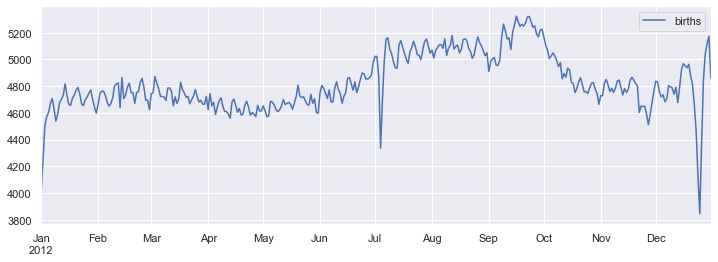

In [165]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# Vectorized String Operations

## Introducing Pandas String Operations

We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [166]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [168]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [169]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [170]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Tables of Pandas String Methods

If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties.
The examples in this section use the following series of names:

In [171]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``lower()``, return a series of strings:

In [172]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [173]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [174]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [175]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

In [176]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [177]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### Vectorized item access and slicing

The ``get()`` and ``slice()`` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using ``str.slice(0, 3)``.
Note that this behavior is also available through Python's normal indexing syntax–for example, ``df.str.slice(0, 3)`` is equivalent to ``df.str[0:3]``:

In [178]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via ``df.str.get(i)`` and ``df.str[i]`` is likewise similar.

These ``get()`` and ``slice()`` methods also let you access elements of arrays returned by ``split()``.
For example, to extract the last name of each entry, we can combine ``split()`` and ``get()``:

In [179]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables

Another method that requires a bit of extra explanation is the ``get_dummies()`` method.
This is useful when your data has a column containing some sort of coded indicator.
For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [180]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The ``get_dummies()`` routine lets you quickly split-out these indicator variables into a ``DataFrame``:

In [181]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## Example: Recipe Database

These vectorized string operations become most useful in the process of cleaning up messy, real-world data.
Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web.
Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

The scripts used to compile this can be found at https://github.com/fictivekin/openrecipes, and the link to the current version of the database is found there as well.

As of Spring 2016, this database is about 30 MB, and can be downloaded and unzipped with these commands:

The database is in JSON format, so we will try ``pd.read_json`` to read it:

In [196]:
try:
    recipes = pd.read_json('data/recipeitems.json', lines=True)
except ValueError as e:
    print("ValueError:", e)

In [197]:
recipes.shape

(173278, 17)

We see there are nearly 175,000 recipes, and 17 columns.
Let's take a look at one row to see what we have:

In [198]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [199]:
recipes.iloc[2]

_id                                {'$oid': '5160756f96cc6207a37ff777'}
name                                 Morrocan Carrot and Chickpea Salad
ingredients           Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...
url                   http://www.101cookbooks.com/archives/moroccan-...
image                 http://www.101cookbooks.com/mt-static/images/f...
ts                                             {'$date': 1365276015332}
cookTime                                                            NaN
source                                                     101cookbooks
recipeYield                                                         NaN
datePublished                                                2013-01-07
prepTime                                                          PT15M
description           A beauty of a carrot salad - tricked out with ...
totalTime                                                           NaN
creator                                                         

There is a lot of information there, but much of it is in a very messy form, as is typical of data scraped from the web.
In particular, the ingredient list is in string format; we're going to have to carefully extract the information we're interested in.
Let's start by taking a closer look at the ingredients:

In [200]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

The ingredient lists average 250 characters long, with a minimum of 0 and a maximum of nearly 10,000 characters!

Just out of curiosity, let's see which recipe has the longest ingredient list:

In [201]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

We can do other aggregate explorations; for example, we can see how many of the recipes are for breakfast foods (using regular expression syntax to match both lowercase and capital letters):

In [203]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

Or how many of the recipes list cinnamon as an ingredient:

In [204]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

We could even look to see whether any recipes misspell the ingredient as "cinamon":

In [205]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

This is the type of data exploration that is possible with Pandas string tools.
It is data munging like this that Python really excels at.

### A Simple Recipe Recommender

Let's go a bit further, and start working on a simple recipe recommendation system: given a list of ingredients, we want to find any recipes that use all those ingredients.
While conceptually straightforward, the task is complicated by the heterogeneity of the data: there is no easy operation, for example, to extract a clean list of ingredients from each row.
So, we will cheat a bit: we'll start with a list of common ingredients, and simply search to see whether they are in each recipe's ingredient list.
For simplicity, let's just stick with herbs and spices for the time being:

In [206]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

We can then build a Boolean `DataFrame` consisting of `True` and `False` values, indicating whether each ingredient appears in the list:

In [207]:
import re
spice_df = pd.DataFrame({
    spice: recipes.ingredients.str.contains(spice, re.IGNORECASE)
    for spice in spice_list})
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


# Working with Time Series

Pandas was originally developed in the context of financial modeling, so as you might expect, it contains an extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Timestamps* reference particular moments in time (e.g., July 4th, 2021 at 7:00 a.m.).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the month of June 2021. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24-hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

This chapter will introduce how to work with each of these types of date/time data in Pandas.
This is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.
We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas.
After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and time spans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other tools used in Python.

### Native Python Dates and Times: datetime and dateutil

Python's basic objects for working with dates and times reside in the built-in `datetime` module.
Along with the third-party `dateutil` module, you can use this to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the `datetime` type:

In [2]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

Or, using the `dateutil` module, you can parse dates from a variety of string formats:

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

Once you have a `datetime` object, you can do things like printing the day of the week:

In [4]:
date.strftime('%A')

'Sunday'

Here we've used one of the standard string format codes for printing dates (`'%A'`), which you can read about in the [`strftime` section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [`datetime` documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [``dateutil``'s online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [`pytz`](http://pytz.sourceforge.net/), which contains tools for working with the most migraine-inducing element of time series data: time zones.

The power of `datetime` and `dateutil` lies in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python `datetime` objects are suboptimal compared to typed arrays of encoded dates.

### Typed Arrays of Times: NumPy's datetime64

NumPy's `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented compactly and operated on in an efficient manner.
The `datetime64` requires a specific input format:

In [5]:
import numpy as np
date = np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

Once we have dates in this form, we can quickly do vectorized operations on it:

In [6]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy `datetime64` arrays, this kind of operation can be accomplished much more quickly than if we were working directly with Python's `datetime` objects, especially as arrays get large
(we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)).

One detail of the `datetime64` and related `timedelta64` objects is that they are built on a *fundamental time unit*.
Because the `datetime64` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, `datetime64` imposes a trade-off between *time resolution* and *maximum time span*.

For example, if you want a time resolution of 1 nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based `datetime`:

In [7]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

Here is a minute-based datetime:

In [8]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [9]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

The following table, drawn from the NumPy `datetime64` documentation, lists the available format codes along with the relative and absolute time spans that they can encode:

|Code  | Meaning     | Time span (relative) | Time span (absolute)   |
|------|-------------|----------------------|------------------------|
| `Y`  | Year        | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| `M`  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| `W`  | Week        | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| `D`  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| `h`  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| `m`  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| `s`  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| `ms` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| `us` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| `ns` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| `ps` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| `fs` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| `as` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is `datetime64[ns]`, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, note that while the `datetime64` data type addresses some of the deficiencies of the built-in Python `datetime` type, it lacks many of the convenient methods and functions provided by `datetime` and especially `dateutil`.
More information can be found in [NumPy's `datetime64` documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates and Times in Pandas: The Best of Both Worlds

Pandas builds upon all the tools just discussed to provide a `Timestamp` object, which combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.
From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

For example, we can use Pandas tools to repeat the demonstration from earlier.
We can parse a flexibly formatted string date and use format codes to output the day of the week, as follows:

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Sunday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

The Pandas time series tools really become useful when you begin to index data by timestamps.
For example, we can construct a `Series` object that has time-indexed data:

In [13]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [14]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [15]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *timestamps*, Pandas provides the `Timestamp` type. As mentioned before, this is essentially a replacement for Python's native `datetime`, but it's based on the more efficient `numpy.datetime64` data type. The associated `Index` structure is `DatetimeIndex`.
- For *time periods*, Pandas provides the `Period` type. This encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index structure is `PeriodIndex`.
- For *time deltas* or *durations*, Pandas provides the `Timedelta` type. `Timedelta` is a more efficient replacement for Python's native `datetime.timedelta` type, and is based on `numpy.timedelta64`. The associated index structure is `TimedeltaIndex`.

The most fundamental of these date/time objects are the `Timestamp` and `DatetimeIndex` objects.
While these class objects can be invoked directly, it is more common to use the `pd.to_datetime` function, which can parse a wide variety of formats.
Passing a single date to `pd.to_datetime` yields a `Timestamp`; passing a series of dates by default yields a `DatetimeIndex`, as you can see here:

In [16]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                       '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a `PeriodIndex` with the `to_period` function, with the addition of a frequency code; here we'll use `'D'` to indicate daily frequency:

In [17]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

A `TimedeltaIndex` is created, for example, when a date is subtracted from another:

In [18]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular Sequences: pd.date_range

To make creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: `pd.date_range` for timestamps, `pd.period_range` for periods, and `pd.timedelta_range` for time deltas.
We've seen that Python's `range` and NumPy's `np.arange` take a start point, end point, and optional step size and return a sequence.
Similarly, `pd.date_range` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates:

In [19]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and end point, but with a start point and a number of periods:

In [20]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the `freq` argument, which defaults to `D`.
For example, here we construct a range of hourly timestamps:

In [21]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of `Period` or `Timedelta` values, the similar `pd.period_range` and `pd.timedelta_range` functions are useful.
Here are some monthly periods:

In [22]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

And a sequence of durations increasing by an hour:

In [23]:
pd.timedelta_range(0, periods=6, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

All of these require an understanding of Pandas frequency codes, which are summarized in the next section.

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a *frequency* or *date offset*. The following table summarizes the main codes available; as with the `D` (day) and `H` (hour) codes demonstrated in the previous sections, we can use these to specify any desired frequency spacing:

| Code | Description       | Code | Description          |
|------|-------------------|------|----------------------|
| `D`  | Calendar day      | `B`  | Business day         |
| `W`  | Weekly            |      |                      |
| `M`  | Month end         | `BM` | Business month end   |
| `Q`  | Quarter end       | `BQ` | Business quarter end |
| `A`  | Year end          | `BA` | Business year end    |
| `H`  | Hours             | `BH` | Business hours       |
| `T`  | Minutes           |      |                      |
| `S`  | Seconds           |      |                      |
| `L`  | Milliseconds       |      |                      |
| `U`  | Microseconds      |      |                      |
| `N`  | Nanoseconds       |      |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
Adding an `S` suffix to any of these causes them to instead be marked at the beginning:

| Code  | Description       | Code  | Description            |
|-------|-------------------|-------|------------------------|
| `MS`  | Month start       |`BMS`  | Business month start   |
| `QS`  | Quarter start     |`BQS`  | Business quarter start |
| `AS`  | Year start        |`BAS`  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

In the same way, the split point of the weekly frequency can be modified by adding a three-letter weekday code:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours and 30 minutes, we can combine the hour (`H`) and minute (`T`) codes as follows:

In [24]:
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the `pd.tseries.offsets` module.
For example, we can create a business day offset directly as follows:

In [25]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

For more discussion of the use of frequencies and offsets, see the [`DateOffset` section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) of the Pandas documentation.

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [41]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


For convenience, we'll shorten the column names:

In [44]:
data.columns = ['Total', 'East', 'West']

Now let's take a look at the summary statistics for this data:

In [45]:
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the Data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data (see the following figure):

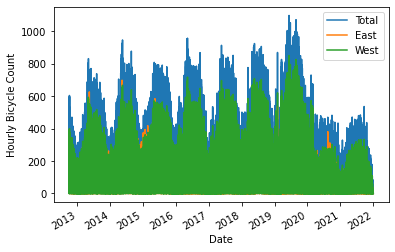

In [47]:
import matplotlib as mpl;
from matplotlib import pyplot as plt;
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~150,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week (see the following figure):

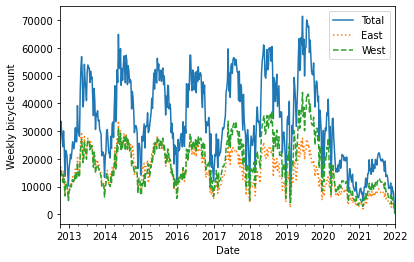

In [48]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');

This reveals some trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), where we explore this further). Further, the effect of the COVID-19 pandemic on commuting patterns is quite clear, starting in early 2020.

Another option that comes in handy for aggregating the data is to use a rolling mean, utilizing the `pd.rolling_mean` function.
Here we'll examine the 30-day rolling mean of our data, making sure to center the window (see the following figure):

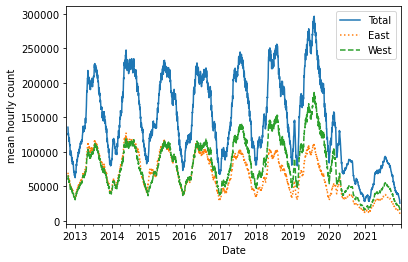

In [49]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window, as shown in the following figure.
The following code specifies both the width of the window (here, 50 days) and the width of the Gaussian window (here, 10 days):

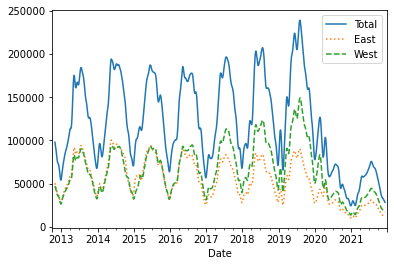

In [50]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--']);

### Digging into the Data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the `groupby` functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb) (see the following figure):

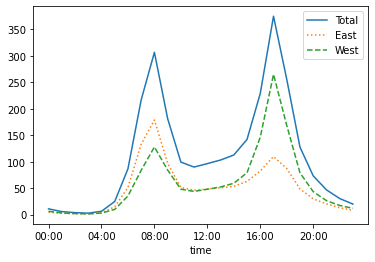

In [51]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

The hourly traffic is a strongly bimodal sequence, with peaks around 8:00 a.m. and 5:00 p.m.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
There is a directional component as well: according to the data, the east sidewalk is used more during the a.m. commute, and the west sidewalk is used more during the p.m. commute.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple `groupby` (see the following figure):

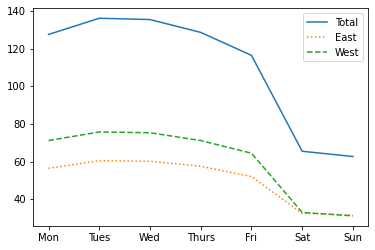

In [52]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound `groupby` and look at the hourly trends on weekdays versus weekends.
We'll start by grouping by flags marking the weekend and the time of day:

In [54]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools that will be described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side, as shown in the following figure:

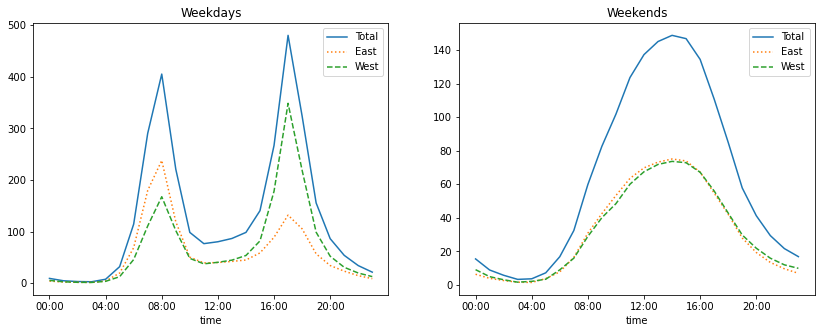

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            xticks=hourly_ticks, style=['-', ':', '--']);

The result shows a bimodal commuting pattern during the work week, and a unimodal recreational pattern during the weekends.
It might be interesting to dig through this data in more detail and examine the effects of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick in Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).